In [106]:
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import pandas as pd
import statsmodels.tsa.stattools as ts
from scipy.stats import linregress
plt.style.use("rose-pine-moon")


In [107]:
def download_data(stock, start, end):
    stock_data ={}
    ticker = yf.download(stock, start, end)
    stock_data['price'] = ticker['Adj Close']
    return pd.DataFrame(stock_data)

In [108]:
def plot_pairs(data1, data2):
    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle("Pair of Stocks")
    ax1.plot(data1)
    ax2.plot(data2)
    plt.show
    

In [109]:
def scatter_plot(data1, data2):
    plt.scatter(data1.values, data2.values)
    plt.xlabel('SPY')
    plt.ylabel("^VIX")   
    plt.show()

In [110]:
if __name__ == '__main__':
    start_date = datetime.datetime(2020, 4, 1)
    end_date = datetime.datetime(2022, 1, 1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


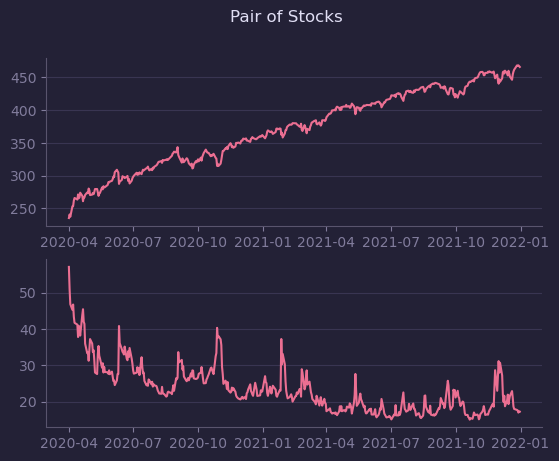

In [111]:
pair1 = download_data('SPY', start_date, end_date)
pair2 = download_data('^VIX', start_date, end_date)
plot_pairs(pair1, pair2)

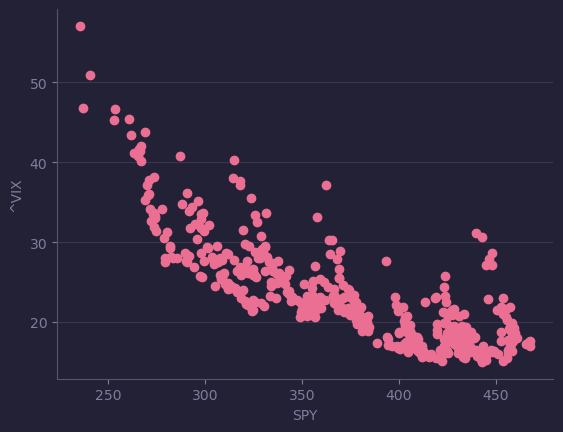

In [112]:
scatter_plot(pair1, pair2)
# Linear regression

In [113]:
result = linregress(pair1.values[:, 0], pair2.values[:, 0])
print(result)

LinregressResult(slope=-0.09365525504348053, intercept=58.27230596615954, rvalue=-0.8095934439954185, pvalue=4.336764317781614e-104, stderr=0.003233533237892986, intercept_stderr=1.214533390476123)


In [114]:
residuals = pair1 - result.slope * pair2
adf = ts.adfuller(residuals)
print(adf)




(-1.3125463586087165, 0.6234129709335814, 4, 438, {'1%': -3.445368352170937, '5%': -2.8681614049724002, '10%': -2.570296970872167}, 2232.687613380311)
